<a href="https://colab.research.google.com/github/seo-jeong-bang/like_code/blob/main/%ED%95%9C%EA%B5%AD%EB%B6%80%EB%8F%99%EC%82%B0%EC%9B%90_%EC%8B%A4%EA%B1%B0%EB%9E%98_%EA%B0%80%EA%B2%A9_%EC%A7%80%EC%88%98%EB%A1%9C_%EC%95%8C%EC%95%84%EB%B3%B4%EB%8A%94_%EC%A7%91_%EA%B0%92_%EB%B3%80%EB%8F%99_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#코랩 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
plt.rc('font', family='NanumBarunGothic')

## 1. 데이터 불러오기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/한국부동산원_공동주택 실거래가격지수_아파트_월별 지역별 매매_20220531.csv', encoding = 'cp949')

In [6]:
df.head()

,지역,Jan-06,Feb-06,Mar-06,Apr-06,May-06,Jun-06,Jul-06,Aug-06,Sep-06,...,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22,May-22
0,전국,62.846,63.482,64.133,64.705,65.170,65.721,66.015,66.955,68.052,...,137.750,140.362,141.855,141.399,140.065,139.416,139.103,139.586,140.461,139.1
1,수도권,66.638,67.736,68.862,69.824,70.649,71.084,71.627,72.771,74.303,...,162.935,166.658,168.219,167.466,165.195,163.820,162.986,163.831,165.031,162.9
2,지방,59.695,59.710,59.688,59.679,59.592,60.374,60.338,60.985,61.296,...,116.761,118.477,119.961,119.788,119.261,119.239,119.385,119.601,120.240,119.6
3,6대광역시,57.592,57.567,57.532,57.597,57.611,58.014,58.094,58.641,59.152,...,130.989,132.974,134.704,134.177,132.691,132.293,132.504,132.351,132.741,131.7
4,5대광역시,56.322,56.177,55.987,55.850,55.683,56.042,56.073,56.504,56.949,...,127.672,129.120,130.690,130.003,128.913,128.572,128.548,128.465,128.908,128.0


In [7]:
df.shape

(28, 198)

## 2. 전처리

- 데이터프레임의 행과 열을 전환시켜서 날짜를 인덱스로 지정
- 날짜 수정 : 숫자로 변환
- 숫자 스케일링 : 100을 1로 기준삼아서 스케일


In [8]:
# 행 열 전환

df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
지역,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
Jan-06,62.846,66.638,59.695,57.592,56.322,62.947,61.037,58.77,59.075,56.506,...,73.488,71.133,60.817,66.151,77.061,58.088,50.946,66.892,63.584,39.117
Feb-06,63.482,67.736,59.71,57.567,56.177,63.111,62.161,57.747,59.482,56.527,...,76.122,72.328,61.159,67.249,77.876,58.402,50.55,66.507,63.437,38.05
Mar-06,64.133,68.862,59.688,57.532,55.987,63.26,63.694,60.035,59.779,57.243,...,78.756,73.245,59.889,67.687,78.383,58.827,50.868,66.629,63.889,36.32
Apr-06,64.705,69.824,59.679,57.597,55.85,63.384,64.676,59.398,59.843,57.589,...,75.04,74.278,60.463,68.692,78.265,59.023,51.158,66.438,63.495,36.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jan-22,139.416,163.82,119.239,132.293,128.572,110.362,175.615,175.134,184.697,169.415,...,153.033,161.354,113.558,113.66,116.006,116.064,116.886,103.208,102.508,110.71
Feb-22,139.103,162.986,119.385,132.504,128.548,110.689,173.898,175.125,179.53,169.925,...,155.316,160.533,114.023,114.883,115.394,116.942,116.026,103.97,102.826,110.828
Mar-22,139.586,163.831,119.601,132.351,128.465,111.262,174.861,175.538,183.413,170.554,...,153.278,161.662,115.912,114.73,115.869,117.959,116.316,103.369,103.669,112.253
Apr-22,140.461,165.031,120.24,132.741,128.908,112.164,177.146,174.976,186.175,172.089,...,150.87,162.505,117.145,115.392,116.316,120.012,116.906,104.364,104.034,114.674


In [9]:
# 첫번째 행을 컬럼으로 지정

df_ = df.rename(columns=df.iloc[0])
df_

,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
지역,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
Jan-06,62.846,66.638,59.695,57.592,56.322,62.947,61.037,58.77,59.075,56.506,...,73.488,71.133,60.817,66.151,77.061,58.088,50.946,66.892,63.584,39.117
Feb-06,63.482,67.736,59.71,57.567,56.177,63.111,62.161,57.747,59.482,56.527,...,76.122,72.328,61.159,67.249,77.876,58.402,50.55,66.507,63.437,38.05
Mar-06,64.133,68.862,59.688,57.532,55.987,63.26,63.694,60.035,59.779,57.243,...,78.756,73.245,59.889,67.687,78.383,58.827,50.868,66.629,63.889,36.32
Apr-06,64.705,69.824,59.679,57.597,55.85,63.384,64.676,59.398,59.843,57.589,...,75.04,74.278,60.463,68.692,78.265,59.023,51.158,66.438,63.495,36.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jan-22,139.416,163.82,119.239,132.293,128.572,110.362,175.615,175.134,184.697,169.415,...,153.033,161.354,113.558,113.66,116.006,116.064,116.886,103.208,102.508,110.71
Feb-22,139.103,162.986,119.385,132.504,128.548,110.689,173.898,175.125,179.53,169.925,...,155.316,160.533,114.023,114.883,115.394,116.942,116.026,103.97,102.826,110.828
Mar-22,139.586,163.831,119.601,132.351,128.465,111.262,174.861,175.538,183.413,170.554,...,153.278,161.662,115.912,114.73,115.869,117.959,116.316,103.369,103.669,112.253
Apr-22,140.461,165.031,120.24,132.741,128.908,112.164,177.146,174.976,186.175,172.089,...,150.87,162.505,117.145,115.392,116.316,120.012,116.906,104.364,104.034,114.674


In [10]:
# 첫번째 행 삭제

df = df_.drop(df_.index[0])
df

,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
Jan-06,62.846,66.638,59.695,57.592,56.322,62.947,61.037,58.77,59.075,56.506,...,73.488,71.133,60.817,66.151,77.061,58.088,50.946,66.892,63.584,39.117
Feb-06,63.482,67.736,59.71,57.567,56.177,63.111,62.161,57.747,59.482,56.527,...,76.122,72.328,61.159,67.249,77.876,58.402,50.55,66.507,63.437,38.05
Mar-06,64.133,68.862,59.688,57.532,55.987,63.26,63.694,60.035,59.779,57.243,...,78.756,73.245,59.889,67.687,78.383,58.827,50.868,66.629,63.889,36.32
Apr-06,64.705,69.824,59.679,57.597,55.85,63.384,64.676,59.398,59.843,57.589,...,75.04,74.278,60.463,68.692,78.265,59.023,51.158,66.438,63.495,36.406
May-06,65.17,70.649,59.592,57.611,55.683,63.377,65.101,61.21,59.984,58.322,...,76.811,75.483,61.296,68.159,76.115,59.29,52.56,66.459,63.461,37.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jan-22,139.416,163.82,119.239,132.293,128.572,110.362,175.615,175.134,184.697,169.415,...,153.033,161.354,113.558,113.66,116.006,116.064,116.886,103.208,102.508,110.71
Feb-22,139.103,162.986,119.385,132.504,128.548,110.689,173.898,175.125,179.53,169.925,...,155.316,160.533,114.023,114.883,115.394,116.942,116.026,103.97,102.826,110.828
Mar-22,139.586,163.831,119.601,132.351,128.465,111.262,174.861,175.538,183.413,170.554,...,153.278,161.662,115.912,114.73,115.869,117.959,116.316,103.369,103.669,112.253
Apr-22,140.461,165.031,120.24,132.741,128.908,112.164,177.146,174.976,186.175,172.089,...,150.87,162.505,117.145,115.392,116.316,120.012,116.906,104.364,104.034,114.674


###인덱스 날짜 형식 변경


In [11]:
df.index

Index(['Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06', 'Jul-06',
       'Aug-06', 'Sep-06', 'Oct-06',
       ...
       'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22',
       'Mar-22', 'Apr-22', 'May-22'],
      dtype='object', length=197)

In [12]:
# 인덱스 날짜를 datetime 으로 변환

df.index = pd.to_datetime(df.index, format ='%b-%y', errors='coerce').strftime("%Y-%m")
df

,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2006-01,62.846,66.638,59.695,57.592,56.322,62.947,61.037,58.77,59.075,56.506,...,73.488,71.133,60.817,66.151,77.061,58.088,50.946,66.892,63.584,39.117
2006-02,63.482,67.736,59.71,57.567,56.177,63.111,62.161,57.747,59.482,56.527,...,76.122,72.328,61.159,67.249,77.876,58.402,50.55,66.507,63.437,38.05
2006-03,64.133,68.862,59.688,57.532,55.987,63.26,63.694,60.035,59.779,57.243,...,78.756,73.245,59.889,67.687,78.383,58.827,50.868,66.629,63.889,36.32
2006-04,64.705,69.824,59.679,57.597,55.85,63.384,64.676,59.398,59.843,57.589,...,75.04,74.278,60.463,68.692,78.265,59.023,51.158,66.438,63.495,36.406
2006-05,65.17,70.649,59.592,57.611,55.683,63.377,65.101,61.21,59.984,58.322,...,76.811,75.483,61.296,68.159,76.115,59.29,52.56,66.459,63.461,37.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01,139.416,163.82,119.239,132.293,128.572,110.362,175.615,175.134,184.697,169.415,...,153.033,161.354,113.558,113.66,116.006,116.064,116.886,103.208,102.508,110.71
2022-02,139.103,162.986,119.385,132.504,128.548,110.689,173.898,175.125,179.53,169.925,...,155.316,160.533,114.023,114.883,115.394,116.942,116.026,103.97,102.826,110.828
2022-03,139.586,163.831,119.601,132.351,128.465,111.262,174.861,175.538,183.413,170.554,...,153.278,161.662,115.912,114.73,115.869,117.959,116.316,103.369,103.669,112.253
2022-04,140.461,165.031,120.24,132.741,128.908,112.164,177.146,174.976,186.175,172.089,...,150.87,162.505,117.145,115.392,116.316,120.012,116.906,104.364,104.034,114.674


In [13]:
df.index

Index(['2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10',
       ...
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05'],
      dtype='object', length=197)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 2006-01 to 2022-05
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전국      197 non-null    object
 1   수도권     197 non-null    object
 2   지방      197 non-null    object
 3   6대광역시   197 non-null    object
 4   5대광역시   197 non-null    object
 5   8개도     197 non-null    object
 6   서울      197 non-null    object
 7   서울 도심권  197 non-null    object
 8   서울 동북권  197 non-null    object
 9   서울 서북권  197 non-null    object
 10  서울 서남권  197 non-null    object
 11  서울 동남권  197 non-null    object
 12  부산      197 non-null    object
 13  대구      197 non-null    object
 14  인천      197 non-null    object
 15  광주      197 non-null    object
 16  대전      197 non-null    object
 17  울산      197 non-null    object
 18  세종      197 non-null    object
 19  경기      197 non-null    object
 20  강원      197 non-null    object
 21  충북      197 non-null    object
 22  충남      197 non-null 

In [15]:
df=df.astype(float)

### 스케일링 

문재인 정부는 2017년 11월 집값을 100으로 놓고 지수화를 하였다. 
2017년 11월 데이터를 1로 두고 조금 더 보기 좋게 수치화 해주었다.

In [16]:
df_1=df*0.01

In [17]:
df_1.loc[['2017-11']]

,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2017-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 시각화

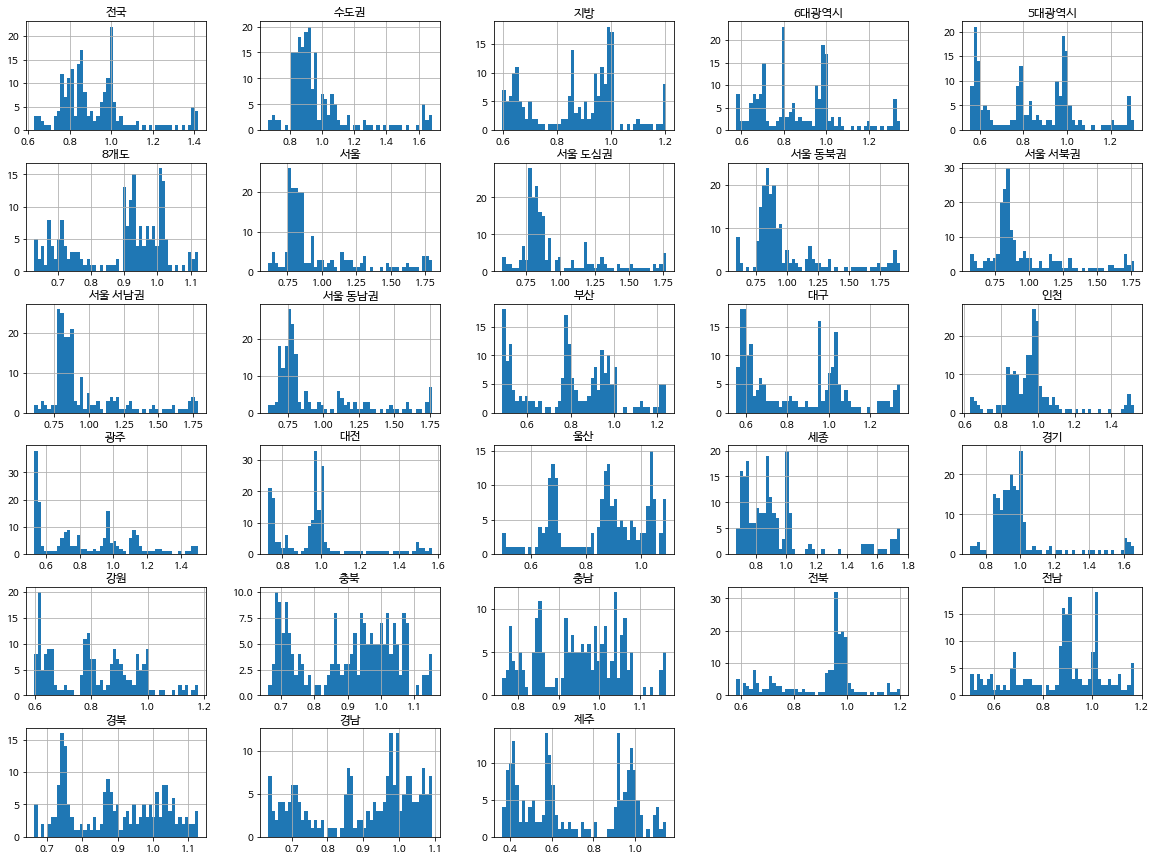

In [18]:
df_1.hist(bins=50,figsize=(20,15))
plt.show()

데이터의 min,max의 값을 똑같이 지정 후에 어느 지역이 가장 변동 폭이 컸는지 대략적인 정보를 알기 위해 그려보았다.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7c482d950>,
      dtype=object)

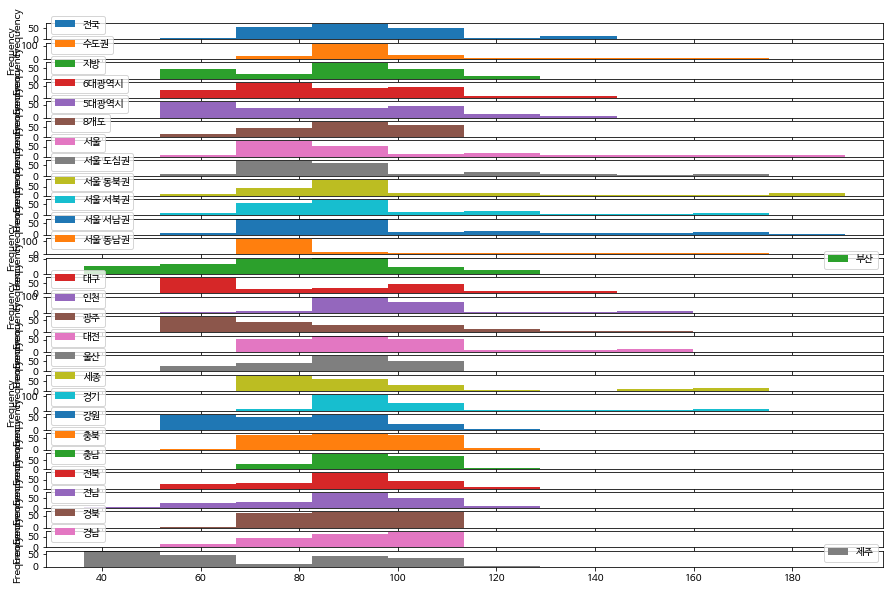

In [19]:
df.plot.hist(subplots=True,figsize=(15,10))

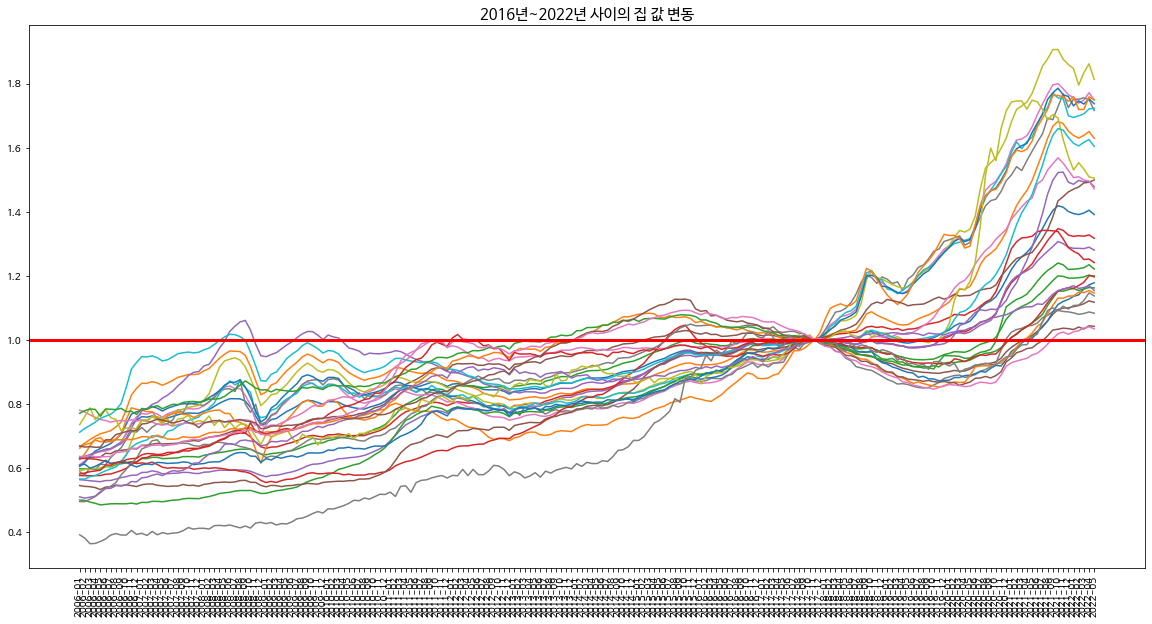

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df_1.index,df_1)
#plt.legend(df_1.columns,loc='upper left')
plt.xticks(rotation=90)
plt.title('2016년~2022년 사이의 집 값 변동',fontsize=15)
plt.axhline(y=1,color='r',linewidth=3)

plt.show()

전체적인 집 값 변동 그래프를 살펴본 후 중점적으로 알아보고자 하는 사실




**1. 서울 집값**


*    2006년에서 2022년 동안에 어느 지역이 가장 집 값이 상승했는지 히트맵을 통해 살펴보기
*   16년동안의 데이터를 5년주기로 분리하여 변동폭이 가장 큰 지역은 어디인지,
그해에 벌어진 이슈들이 집 값에 어떠한 영향을 끼쳤는지 알아보기





**2.   8개도, 6대 광역시**


*   2006년에서 2022년 동안에 어느 지역이 가장 집 값이 상승했는지 히트맵을 통해 살펴보기
*   16년동안의 데이터를 5년주기로 분리하여 변동폭이 가장 큰 지역은 어디인지,
그해에 벌어진 이슈들이 집 값에 어떠한 영향을 끼쳤는지 알아보기.




**3.가장 크게 변동폭을 보여준 지역(세종시)**


*   변동폭이 큰 시점에 사회적으로 어떠한 이슈가 있었으며, 이슈가 집 값에 어떠한 영향을 주었는지 알아보기.








###1.서울 집 값


서울의 집 값만을 알아보기 위해서 서울의 데이터만 따로 분리하였다.

In [21]:
df_seoul= df_1[['서울 도심권','서울 동북권','서울 서북권','서울 서남권','서울 동남권']]


####1.1 서울 데이터 살펴보기(꺾은선 그래프, 히트맵)

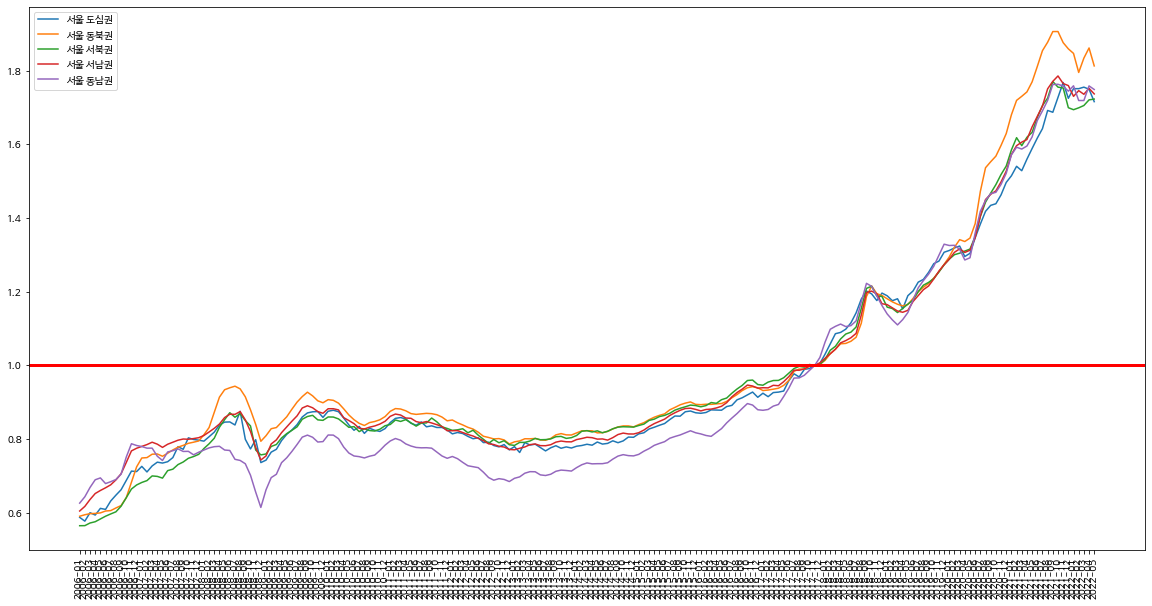

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df_seoul.index,df_seoul)
plt.legend(df_seoul.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)

plt.show()


2017년 11월 집 값을 1로 지수화하여 본 집 값 변동 그래프이다.
그래프를 보면 알 수 있듯이 10년이 넘는 시간동안의 집 값의 변동보다는 2017년 11월 이후의 집 값의 변동이 크다는 사실을 알 수 있다.

그래프에서 두드러지게 보이는 특징은 서울 동북권의 그래프이다.
서울 동북권의 경우 2017년 11월 이전에도 변동의 폭이 큰 지역이었으나 17년 11월 이후에는 훨씬 더 큰 변동을 보여주고 있다.

서울의 집 값 변동 지수를 자세히 알아보기 위하여 5년을 주기로 데이터를 분리하는 작업을 거쳤다.


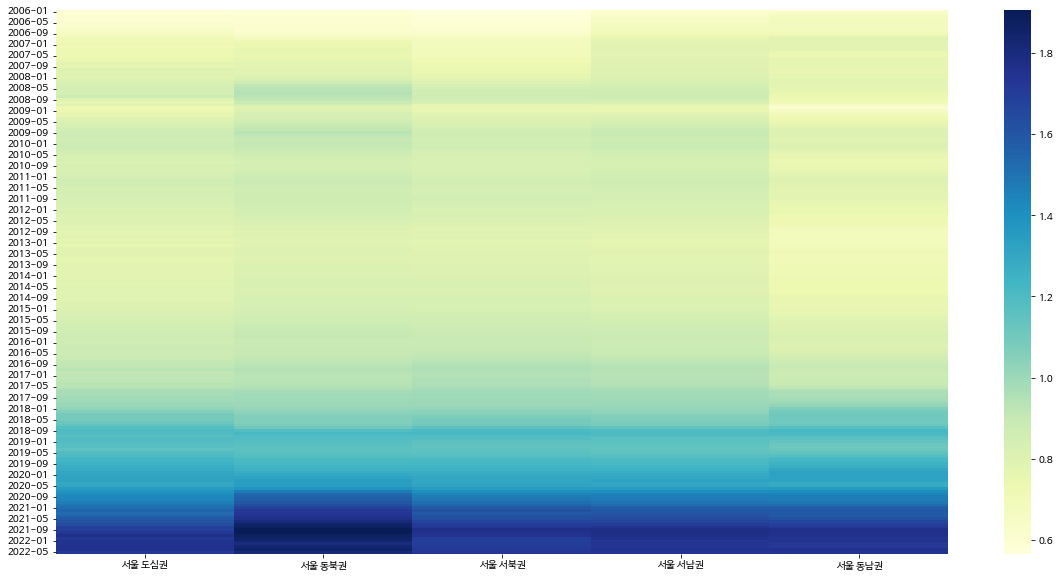

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df_seoul,cmap='YlGnBu')

plt.show()

히트맵으로 살펴보기



1.서울 동북권이 2021년에 5월 기점으로 유난히 진한 색을 띄는 것을 볼 수 있다.


2.서울 동남권은 2008년 9월 그래프에 색이 흐려진 것으로 보아 집값에 변화가 있었음을 알 수 있다.



3.전체적으로 서울의 집 값은 상승세를 보였다는 사실을 알 수 있다.

#### 1.2 서울 데이터 5년 주기로 나누기

In [24]:
seoul_1=df_seoul.loc['2006-01':'2010-12']
seoul_2=df_seoul.loc['2011-01':'2015-12']
seoul_3=df_seoul.loc['2016-01':'2022-05']

####1.3 5년주기로 나눈 서울 데이터 시각화


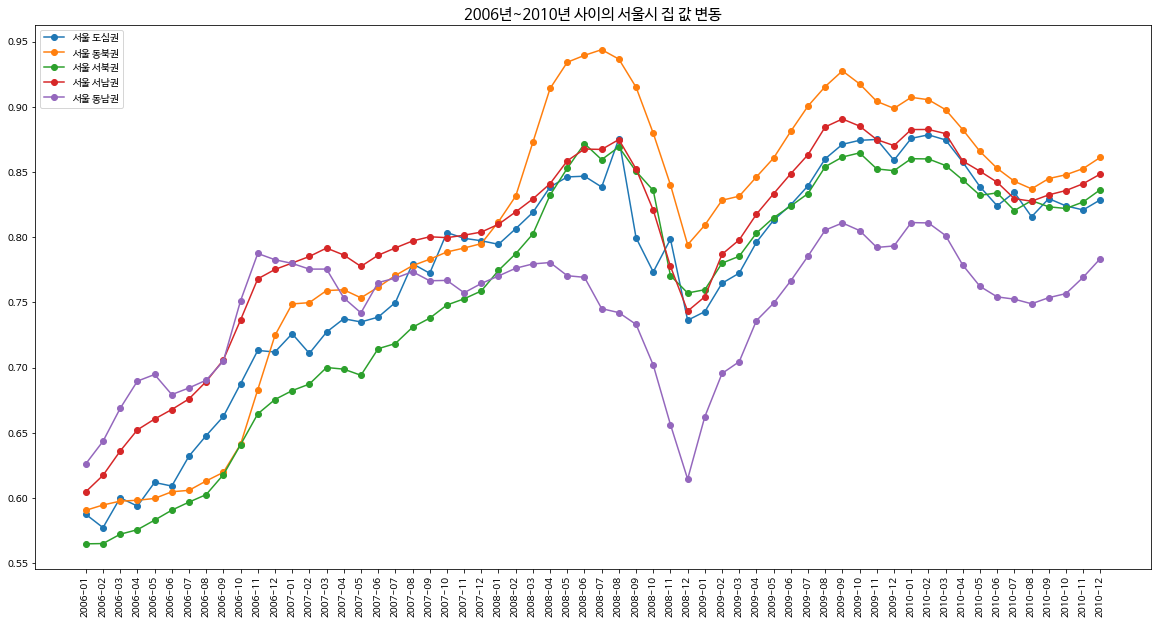

In [36]:
plt.figure(figsize=(20,10))
plt.plot(seoul_1.index,seoul_1,marker='o')
plt.legend(seoul_1.columns,loc='upper left')
plt.xticks(rotation=90)
plt.title('2006년~2010년 사이의 서울시 집 값 변동',fontsize=15)

plt.show()



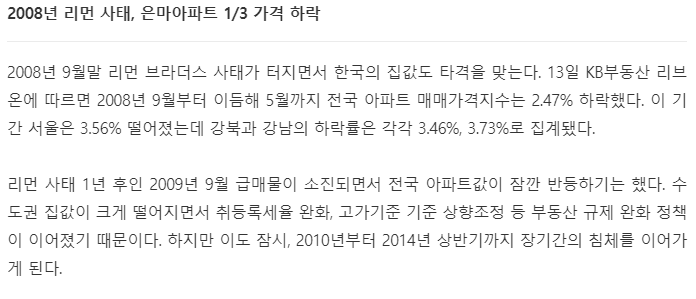

2006년~2010년까지의 데이터를 살펴보면 서울 동북권의 집 값이 가장 높았으며
특히, 2008년 2월 부터 7월까지 집값이 대폭 상승하였다. 

2008년 8월을 기준으로 서울 전국의 집값이 하락하는 추세를 보였으며 서울 동북권이 상승한만큼 하락의 폭이 가장 컸다. 
서울 동남권의 경우 집값의 변동이 크지 않았음에도 불구하고 많은 하락세를 보였다.
 
위의 기사를 보면 알 수 있듯이 리먼 브라더스 사태로 인하여 강남의 유명아파트인 '은마 아파트'의 집 값이 3분의1로 하락하였음을 알 수 있다.

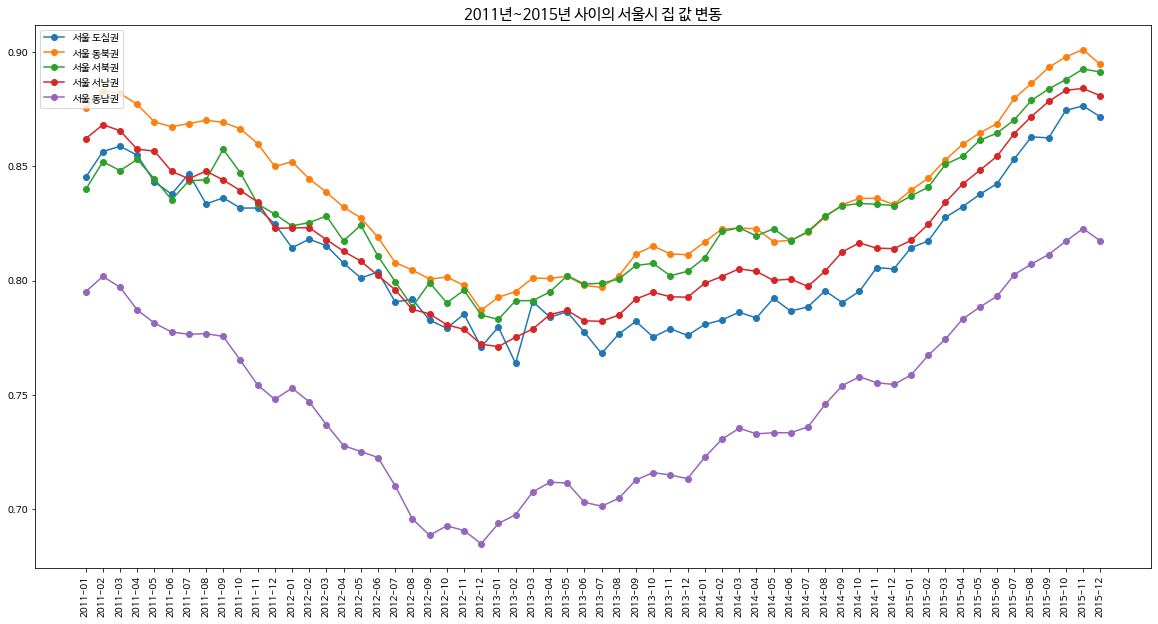

In [37]:
plt.figure(figsize=(20,10))
plt.plot(seoul_2.index,seoul_2,marker='o')
plt.legend(seoul_2.columns,loc='upper left')
plt.xticks(rotation=90)
plt.title('2011년~2015년 사이의 서울시 집 값 변동',fontsize=15)

plt.show()

서울 동남권의 경우 리먼사태의 여파로 2008년 6월부터 하락한 집 값이 회복되는 듯 보였으나 2012년 2월 이후로 지수가 0.75 밑으로 떨어지는 사태가 벌어졌으며 회복하는데에 오랜 시간이 걸렸음을 알 수 있다.

전체적으로 2011년 1월부터 2014년 11월까지의 집 값의 변동 폭이 크지 않았으나 
2014년 12월을 기점으로 꾸준한 성장을 보여주었다.

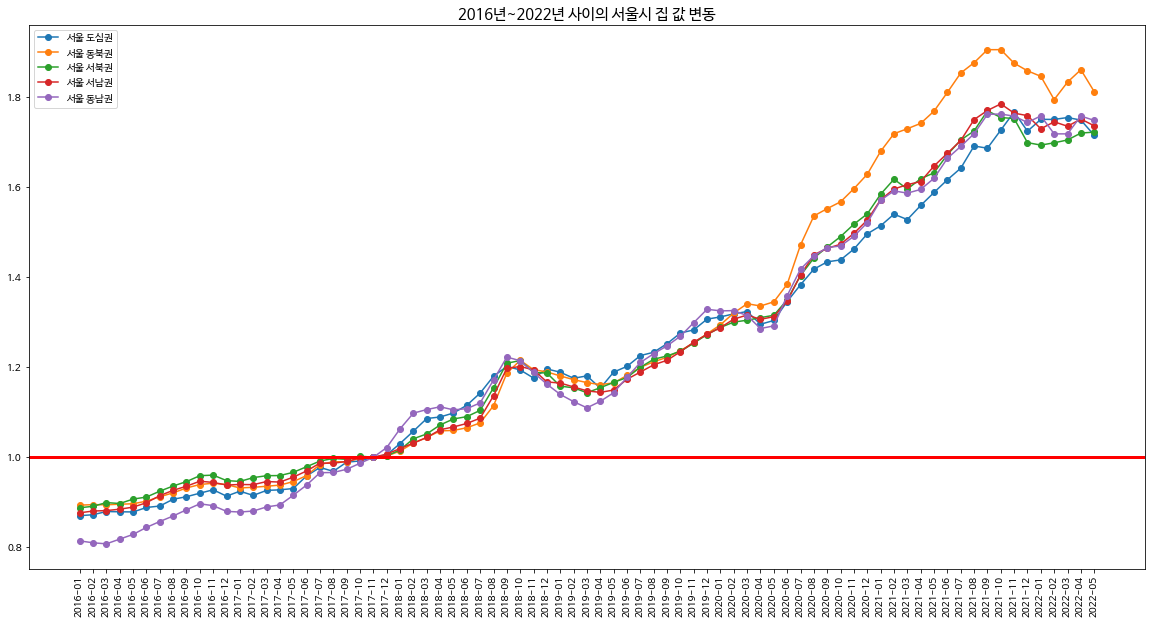

In [38]:
plt.figure(figsize=(20,10))
plt.plot(seoul_3.index,seoul_3,marker='o')
plt.legend(seoul_3.columns,loc='upper left')
plt.xticks(rotation=90)
plt.title('2016년~2022년 사이의 서울시 집 값 변동',fontsize=15)
plt.axhline(y=1,color='r',linewidth=3)

plt.show()

각 지역별로 가장 집값이 높았을 기간은 2021년 10월~11월 사이로 보여지며 
2020년 5월을 시작으로 약 1년 6개월 사이에 대폭적인 상승세를 보였다.

###2."8개도", "6대 광역시"

In [28]:
df_8= df_1[['경기','강원','충북','충남','전북','전남','경북','경남']]

In [29]:
df_8

,경기,강원,충북,충남,전북,전남,경북,경남
2006-01,0.71133,0.60817,0.66151,0.77061,0.58088,0.50946,0.66892,0.63584
2006-02,0.72328,0.61159,0.67249,0.77876,0.58402,0.50550,0.66507,0.63437
2006-03,0.73245,0.59889,0.67687,0.78383,0.58827,0.50868,0.66629,0.63889
2006-04,0.74278,0.60463,0.68692,0.78265,0.59023,0.51158,0.66438,0.63495
2006-05,0.75483,0.61296,0.68159,0.76115,0.59290,0.52560,0.66459,0.63461
...,...,...,...,...,...,...,...,...
2022-01,1.61354,1.13558,1.13660,1.16006,1.16064,1.16886,1.03208,1.02508
2022-02,1.60533,1.14023,1.14883,1.15394,1.16942,1.16026,1.03970,1.02826
2022-03,1.61662,1.15912,1.14730,1.15869,1.17959,1.16316,1.03369,1.03669
2022-04,1.62505,1.17145,1.15392,1.16316,1.20012,1.16906,1.04364,1.04034


In [30]:
df_6= df_1[['인천','광주','부산','대구','울산','대전']]

####2.1 8개도 데이터 살펴보기 (꺾은선 그래프. 히트맵)

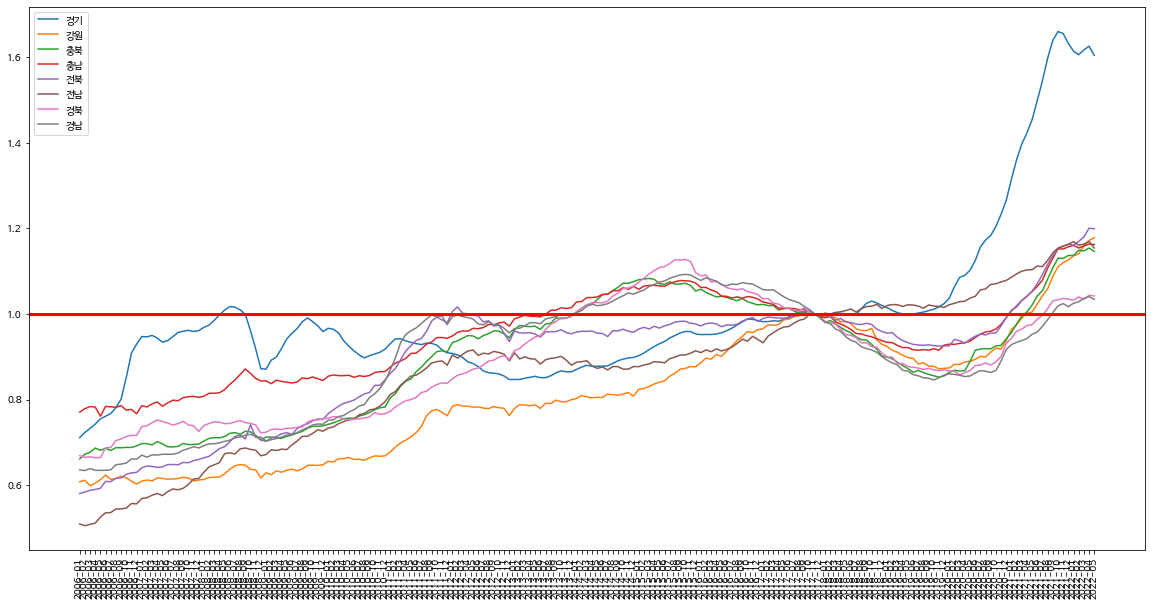

In [31]:
plt.figure(figsize=(20,10))
plt.plot(df_8.index,df_8)
plt.legend(df_8.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)

plt.show()


서울시 데이터와 다르게 2017년 11월 이전에도 지수가 1이상인 지역들이 존재한다.
특히 경기도 데이터의 경우 어느 시점 이후로 굉장히 가파르게 상승하는 것을 볼 수 있으며 이는 경기도 집값이 갑자기 상승했음을 알 수 있다. 그에 비해 다른 지역들은 2017년 11월에 지수를 100으로 맞춘 시점 이후로 집 값이 하락하는 그래프를 보이고 있다.


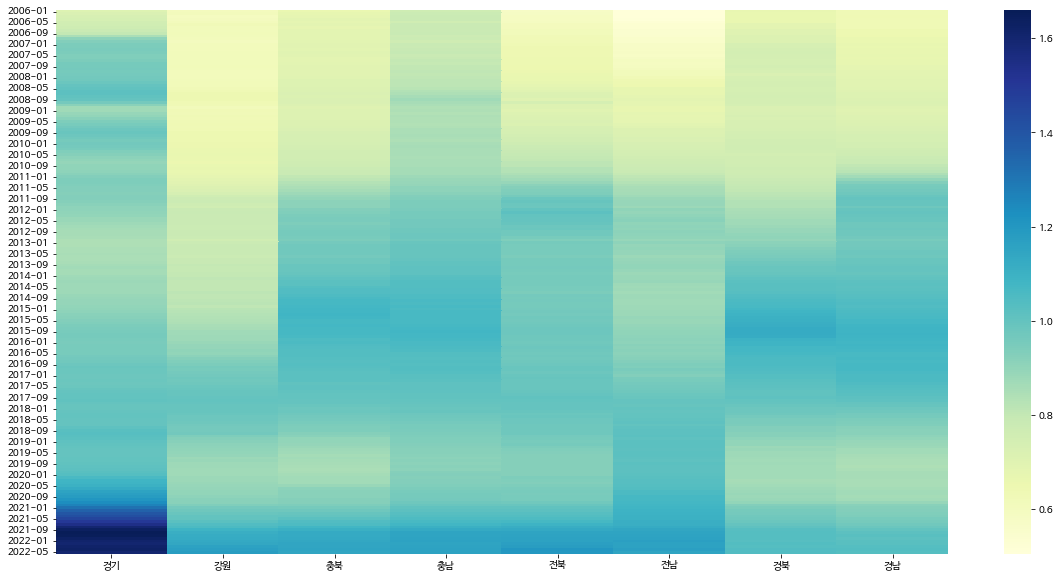

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(df_8,cmap='YlGnBu')

plt.show()

히트맵으로 살펴보면 조금 더 극명한 차이를 확인 할 수 있다.
경기도의 경우 이미 이전부터 푸른색을 띄는 칸들이 존재하며, 그 이외의 지역들도 서울시와는 다르게 푸른 빛을 띄는 칸들이 많다.

####2.2 6개도 데이터 살펴보기

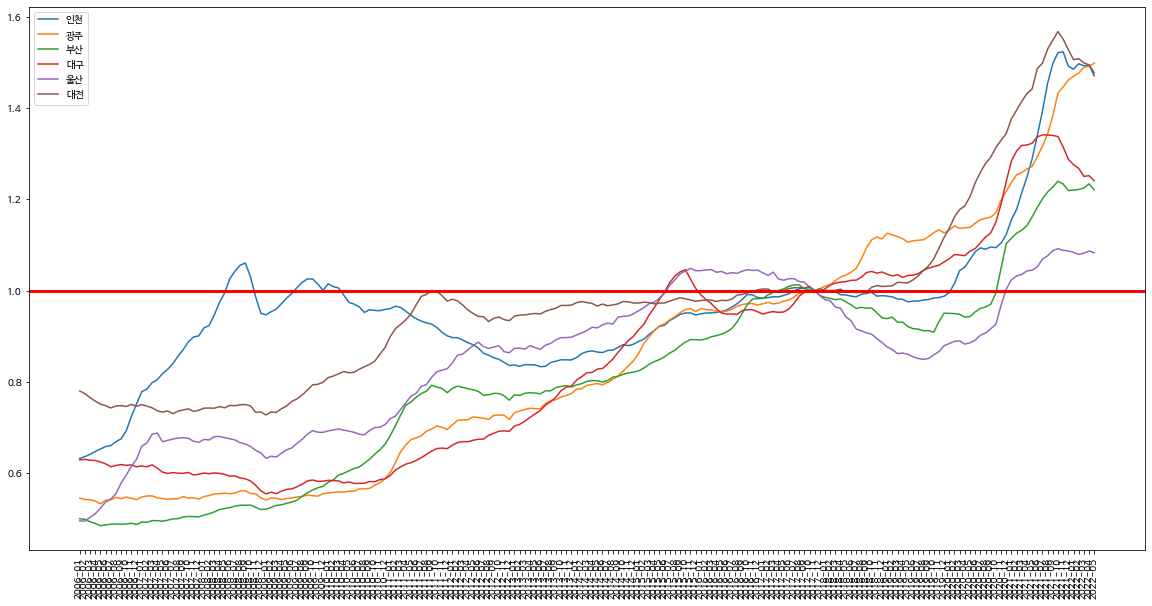

In [49]:
plt.figure(figsize=(20,10))
plt.plot(df_6.index,df_6)
plt.legend(df_6.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)

plt.show()

6개도 데이터의 경우 2017년 11월 이전에 이미 지수 100이 넘은 지역이 인천, 울산, 대구로 3곳이 존재한다.


많은 변동폭을 보이는 지역은 인천과 대전을 뽑을 수 있다.


2017년 11월 이전에는 큰 변동폭을 보이지 않았던 대전이 어느 시점 이후로 굉장히 큰 변동폭을 보이는 것으로 보아 집 값에 영향을 준 사건이 있었을 것으로 추측된다.

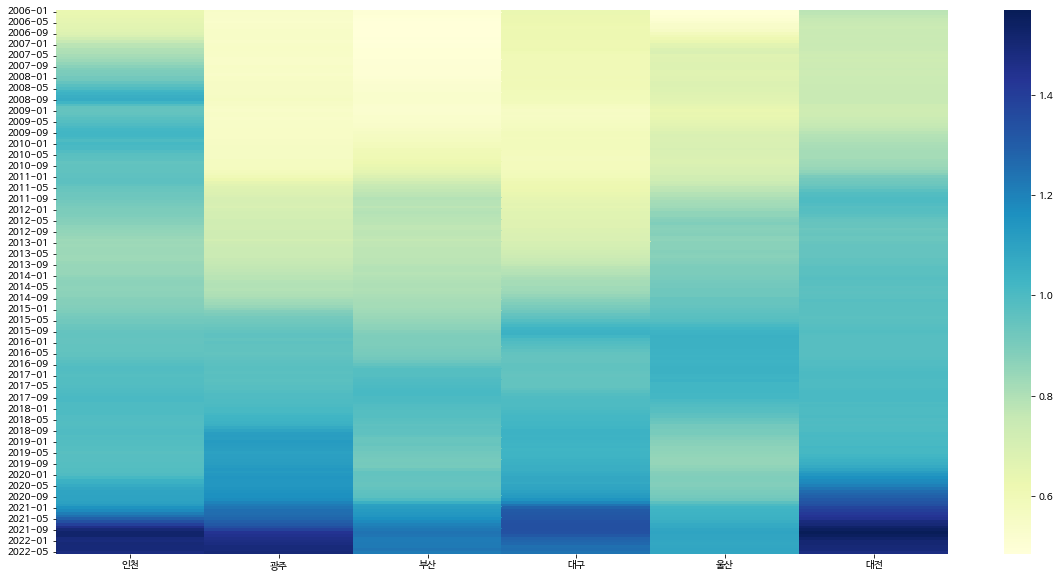

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(df_6,cmap='YlGnBu')

plt.show()

####2.3 8개도 데이터 5년 주기로 나누기

In [32]:
df_8_1=df_8.loc['2006-01':'2010-12']
df_8_2=df_8.loc['2011-01':'2015-12']
df_8_3=df_8.loc['2016-01':'2022-05']

####2.4 5년 주기로 나눈 8개도 데이터 시각화

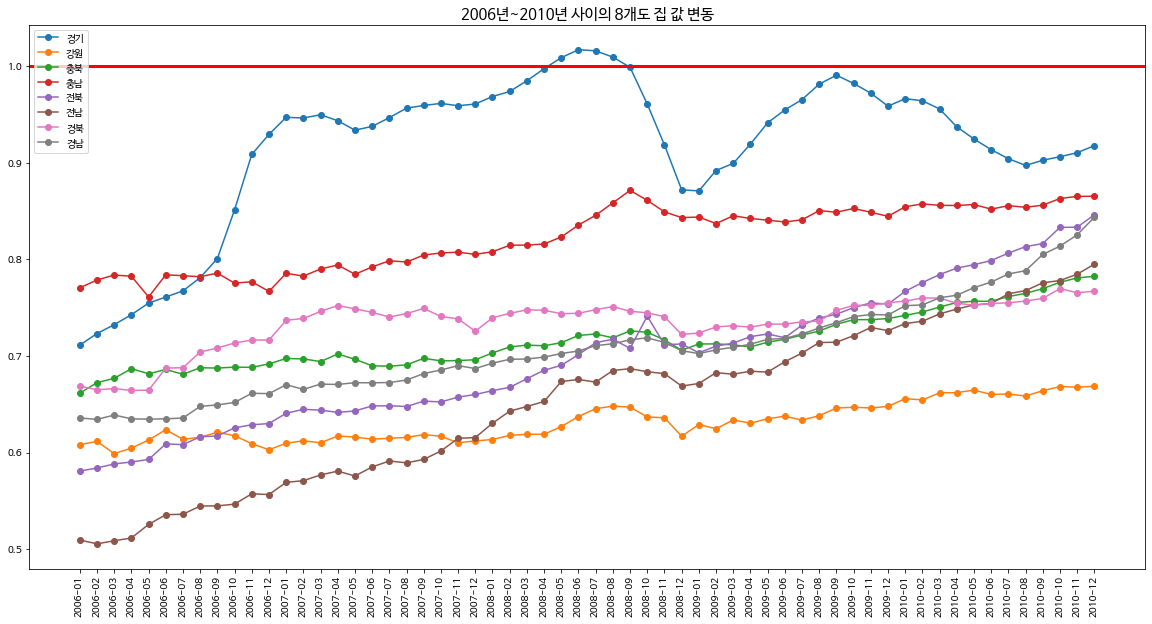

In [39]:
plt.figure(figsize=(20,10))
plt.plot(df_8_1.index,df_8_1,marker='o')
plt.legend(df_8_1.columns,loc='upper left')
plt.xticks(rotation=90)
plt.title('2006년~2010년 사이의 8개도 집 값 변동',fontsize=15)
plt.axhline(y=1,color='r',linewidth=3)
plt.show()

다른 지역의 경우 집 값의 변동폭이 크지 않고 고르게 변화하는 그래프를 보여주고 있다.

그에 반해 경기도의 경우 2006년 9월 이후에 급격한 집 값 상승을 보이다가 2008년 9월을 기점으로 가파른 하락세를 보여주었다.

이는 서울시와 마찬가지로 리먼 사태의 영향을 받은 것으로 보여진다.

리먼사태의 경우 서울과 수도권을 중심으로 영향을 크게 받았기 때문에 다른 지역들은 비교적 큰 하락폭을 보여주고 있지 않다.


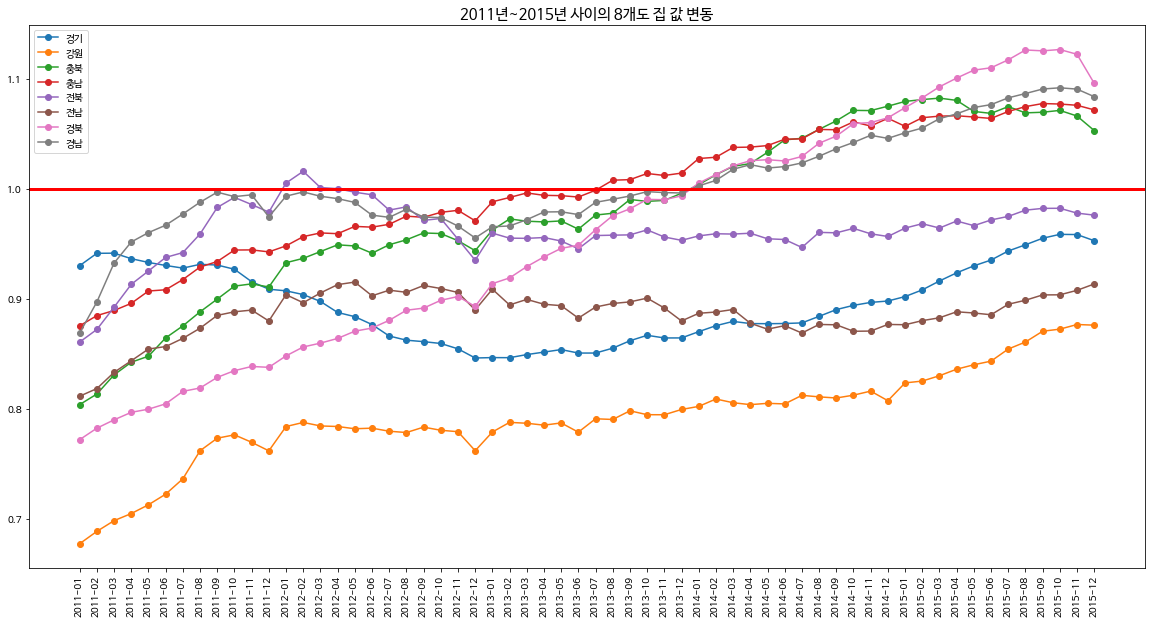

In [40]:
plt.figure(figsize=(20,10))
plt.plot(df_8_2.index,df_8_2,marker='o')
plt.legend(df_8_2.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)
plt.title('2011년~2015년 사이의 8개도 집 값 변동',fontsize=15)

plt.show()

경북과 충남의 경우 큰 폭은 아니지만 꾸준히 집 값이 상승하는 그래프를 보여주고 있다.

경기도의 경우 2012년까지 계속되는 하락세로 2011년 1월에 가장 높은 지수를 보였음에도 불구하고 2012년에는 두번째로 낮은 지수를 보여주고 있다.

이는 지수가 하락하기 전 경기도에 집을 산 시민들은 많은 고통을 겪었을 것으로 예상된다. 

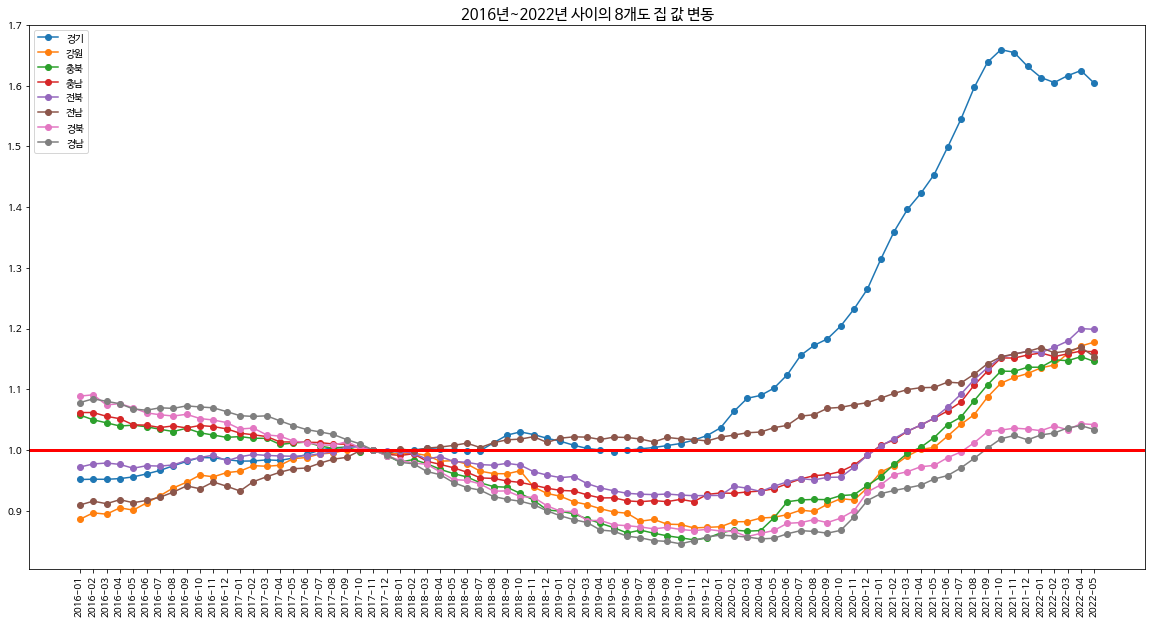

In [41]:
plt.figure(figsize=(20,10))
plt.plot(df_8_3.index,df_8_3,marker='o')
plt.legend(df_8_3.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)
plt.title('2016년~2022년 사이의 8개도 집 값 변동',fontsize=15)

plt.show()

경기도의 경우 2008년 4월에 지수 1 (실제 지수100)을 넘겼는데 2018년 8월이 되어서야 지수 1을 넘긴 사실을 알 수 있다. 이는 지수가 100인 시점의 집 값을 화복하는데에 약 10년이 걸렸다는 사실을 알 수 있다. ( 2018년 9월-12월에는 지수 100을 넘겼으므로 제외하였다.)  

경기도 데이터의 가장 두드러지는 특징은 2020년 이후로 점점 집 값이 상승하기 시작하더니, 2020년 9월을 기점으로 굉장히 가파른 상승세를 보였다.






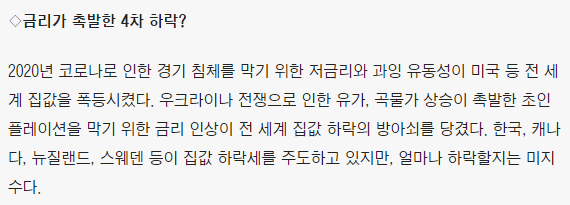

이는 코로나로 인한 경기침체를 막기 위한 저금리와 과잉 유동성이 가장 큰 원인인것으로 보여지며, 8개도중에서 경기도의 집 값 변동에 가장 큰 영향을 주었다.





8개도의 경우 서울시와는 다르게 2017년 11월의 집 값을 100으로 지수화 한 후에 집 값이 오히려 하락하는 추세를 보였다. 

또한 코로나로 인한 저금리와 과잉 유동성에 큰 영향을 받지 않았다는 것을 알 수 있다.




####2.5 6대 광역시 데이터 5년 주기로 나누기

In [43]:
df_6_1=df_6.loc['2006-01':'2010-12']
df_6_2=df_6.loc['2011-01':'2015-12']
df_6_3=df_6.loc['2016-01':'2022-05']

####2.6 5년 주기로 나눈 6대 광역시 데이터 시각화

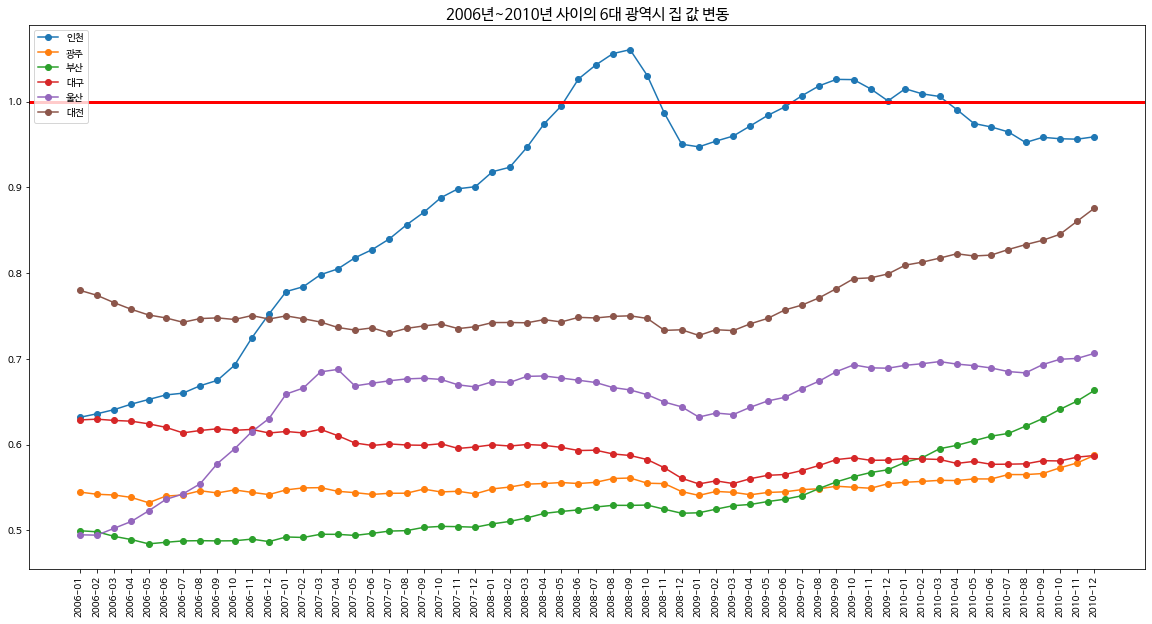

In [47]:
plt.figure(figsize=(20,10))
plt.plot(df_6_1.index,df_6_1,marker='o')
plt.legend(df_6_1.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)
plt.title('2006년~2010년 사이의 6대 광역시 집 값 변동',fontsize=15)

plt.show()

인천의 경우 2008년 5월을 기점으로 지수 1 (실제 지수100)을 넘겼으며, 서울, 경기와 마찬가지로 2008년 9월의 리먼 사태로 인하여 집 값이 하락하는 그래프를 보여주고 있다.


울산의 경우 2006년 8월 이후로 집 값이 상승하였으나 상승세가 오래 가지 못하고 안정적인 변동폭을 보여주었


그외의 광역시의 경우 크게 두드러지는 상승, 하락 폭은 보이지 않고 있다.

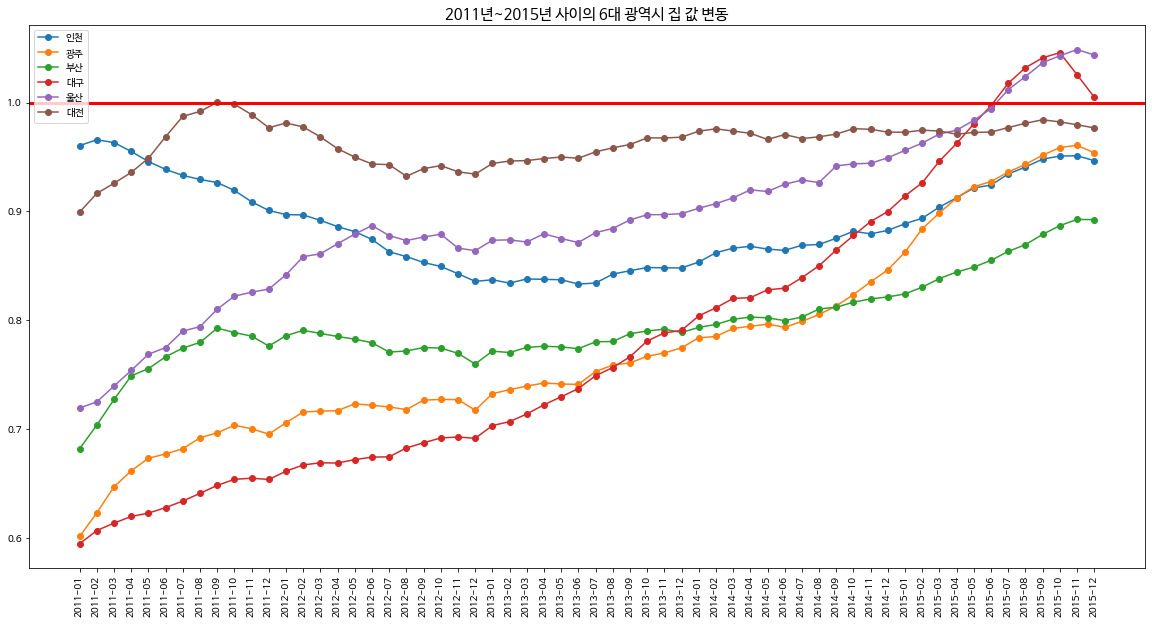

In [46]:
plt.figure(figsize=(20,10))
plt.plot(df_6_2.index,df_6_2,marker='o')
plt.legend(df_6_2.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)
plt.title('2011년~2015년 사이의 6대 광역시 집 값 변동',fontsize=15)

plt.show()

인천의 경우 상승세를 보여주었던 이전의 그래프와는 다르게 계속해서 하락하는 추세를 보여주고 있으며 하락세가 끝나는 2013년 6월 이후에도 집 값의 회복이 더디다.

그에 반해 울산과 대구의 경우 꾸준히 집값이 상승하는 그래프로 폭이 크지는 않지만 안정적으로 집 값이 올랐다는 사실을 알 수 있다.

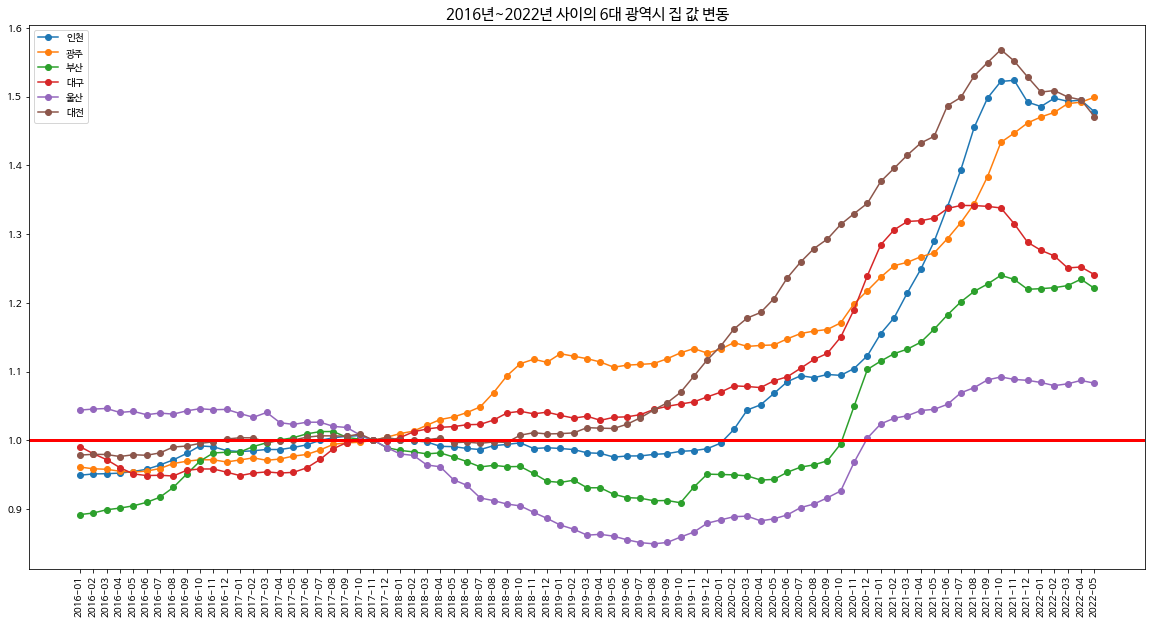

In [48]:
plt.figure(figsize=(20,10))
plt.plot(df_6_3.index,df_6_3,marker='o')
plt.legend(df_6_3.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)
plt.title('2016년~2022년 사이의 6대 광역시 집 값 변동',fontsize=15)

plt.show()

2017년 11월 집 값 지수를 100으로 지정한 후에 일부 지역은 하락세 
일부 지역은 상승세를 보이고 있다.

광주의 경우 17년 11월 이후 작은 상승폭을 보여주다가 2021년 6월을 기점으로 큰 상승폭을 보여주고 있다.


가장 큰 상승폭을 보여주고 있는 지역은 인천으로 2020년 초에도 코로나의 영향으로 집 값이 오르지만. 2020년 말부터 급격한 상승을 보여주고 있다. 이는 코로나가 벌어진 2020년에  많은 사람들이 투기 목적으로 인천에 집을 구매했던 점이 집 값의 상승으로 이어졌을것이라고 추측된다.


2020년 코로나 사태이후 비교적 일정한 속도로 상승하는 지역은 대전이다.
이는 경기도의 집 값 상승의 원인과 동일한 경기침체를 막기 위한 저금리와 과잉 유동성이 가장 큰 원인인것으로 보여진다.

###3.가장 크게 변동폭을 보여준 지역(세종시)

In [52]:
df_sj= df_1[['세종']]

In [53]:
df_sj

,세종
2006-01,0.73488
2006-02,0.76122
2006-03,0.78756
2006-04,0.75040
2006-05,0.76811
...,...
2022-01,1.53033
2022-02,1.55316
2022-03,1.53278
2022-04,1.50870


####3.1 세종시 데이터 살펴보기 (꺾은선 그래프, 히트맵)

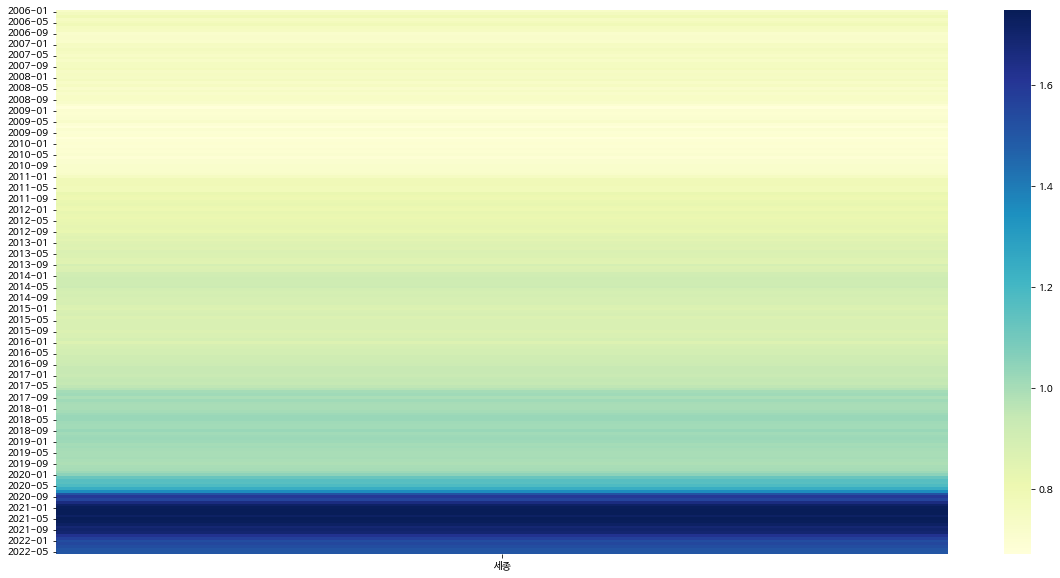

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df_sj,cmap='YlGnBu')

plt.show()

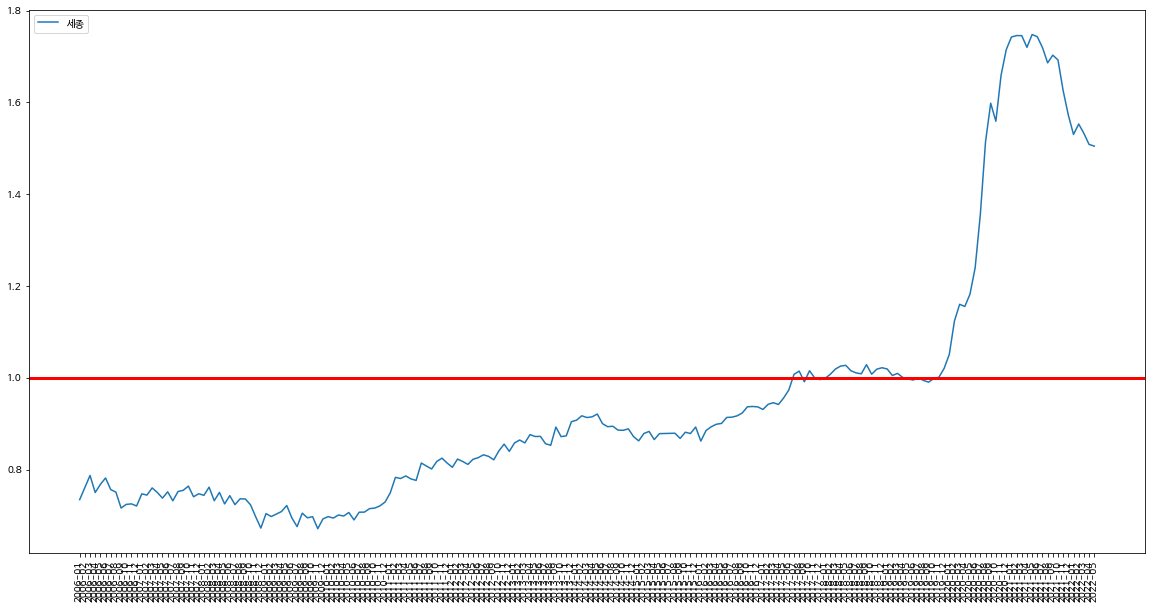

In [55]:
plt.figure(figsize=(20,10))
plt.plot(df_sj.index,df_sj)
plt.legend(df_sj.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)

plt.show()

####3.2 세종시 데이터 5년 주기로 나누기

In [56]:
df_sj_1=df_sj.loc['2006-01':'2010-12']
df_sj_2=df_sj.loc['2011-01':'2015-12']
df_sj_3=df_sj.loc['2016-01':'2022-05']

#### 3.3 5년 주기로 나눈 세종시 데이터 시각화

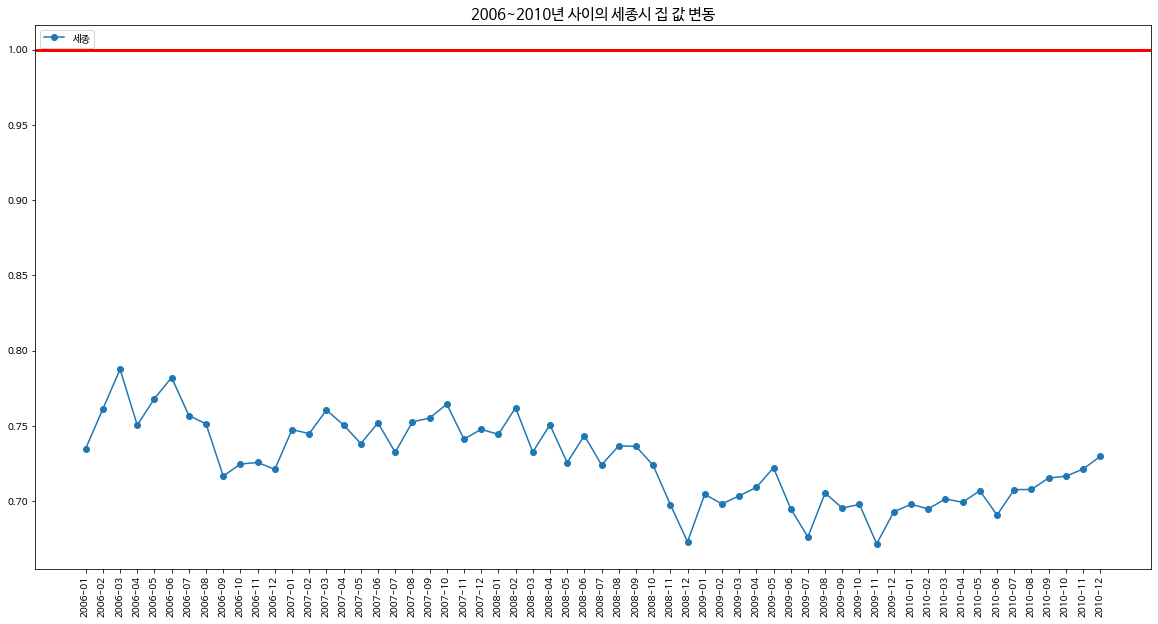

In [58]:
plt.figure(figsize=(20,10))
plt.plot(df_sj_1.index,df_sj_1,marker='o')
plt.legend(df_sj_1.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)
plt.title('2006~2010년 사이의 세종시 집 값 변동',fontsize=15)

plt.show()

세종시의 경우 2006년~2010년의 집 값 지수가 2017년 11월을 기준으로 한 지수 1에 한참 못 미치는 수준이었다는 사실을 알 수 있다.

세종시의 경우 비교적 개발이 되어 있지 않은 지역이었기 때문에 가격 변동에 영향을 줄 이슈들이 존재하지 않았다.

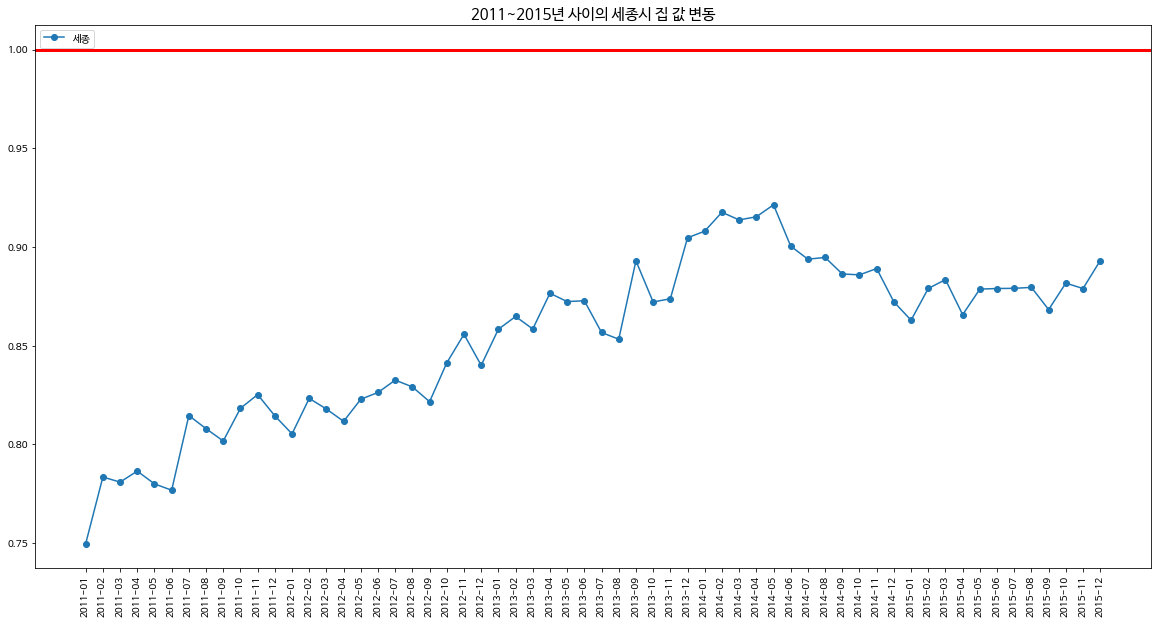

In [59]:
plt.figure(figsize=(20,10))
plt.plot(df_sj_2.index,df_sj_2,marker='o')
plt.legend(df_sj_2.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)
plt.title('2011~2015년 사이의 세종시 집 값 변동',fontsize=15)

plt.show()

세종시에 정부청사 이전 이슈가 발생한 후로 집 값 지수의 변화가 생겼다.
달별로 보면 눈에 띄는 상승이 보이지 않지만 장기적으로 보았을때에는 집 값이 상승했다는 사실을 알 수 있다.

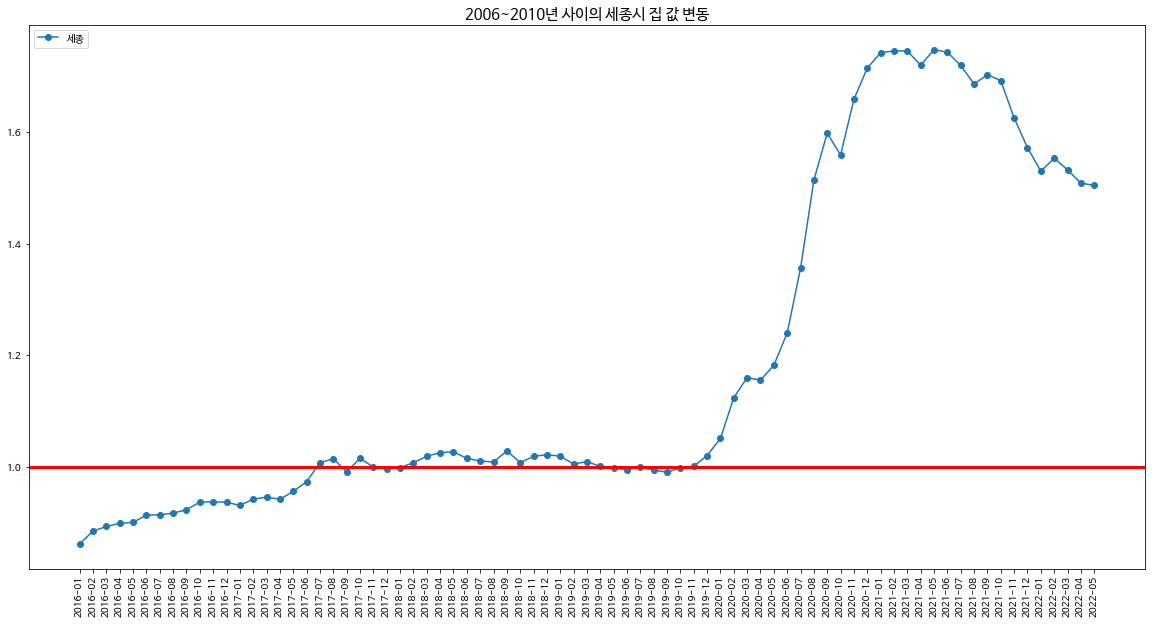

In [60]:
plt.figure(figsize=(20,10))
plt.plot(df_sj_3.index,df_sj_3,marker='o')
plt.legend(df_sj_3.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)
plt.title('2006~2010년 사이의 세종시 집 값 변동',fontsize=15)

plt.show()

그 이후에도 세종시는 꾸준한 상승을 하고 있었으나 폭이 큰 상승은 아니었다.

그러나 2017년 7월 처음으로 지수1을 넘기고 2019년 말까지 계속 1을 웃도는 지수를 유지하였다.

2020년부터는 코로나로 인한 집 값 상승과 투기를 목적으로 한 집 값 상승이 겹치게 되면서 이례적인 상승폭을 보여주었다.

##3. 결론

### 가장 큰 변동폭 BEST3

In [61]:
df_BEST= df_1[['세종','경기','서울']]

In [62]:
df_BEST

,세종,경기,서울
2006-01,0.73488,0.71133,0.61037
2006-02,0.76122,0.72328,0.62161
2006-03,0.78756,0.73245,0.63694
2006-04,0.75040,0.74278,0.64676
2006-05,0.76811,0.75483,0.65101
...,...,...,...
2022-01,1.53033,1.61354,1.75615
2022-02,1.55316,1.60533,1.73898
2022-03,1.53278,1.61662,1.74861
2022-04,1.50870,1.62505,1.77146


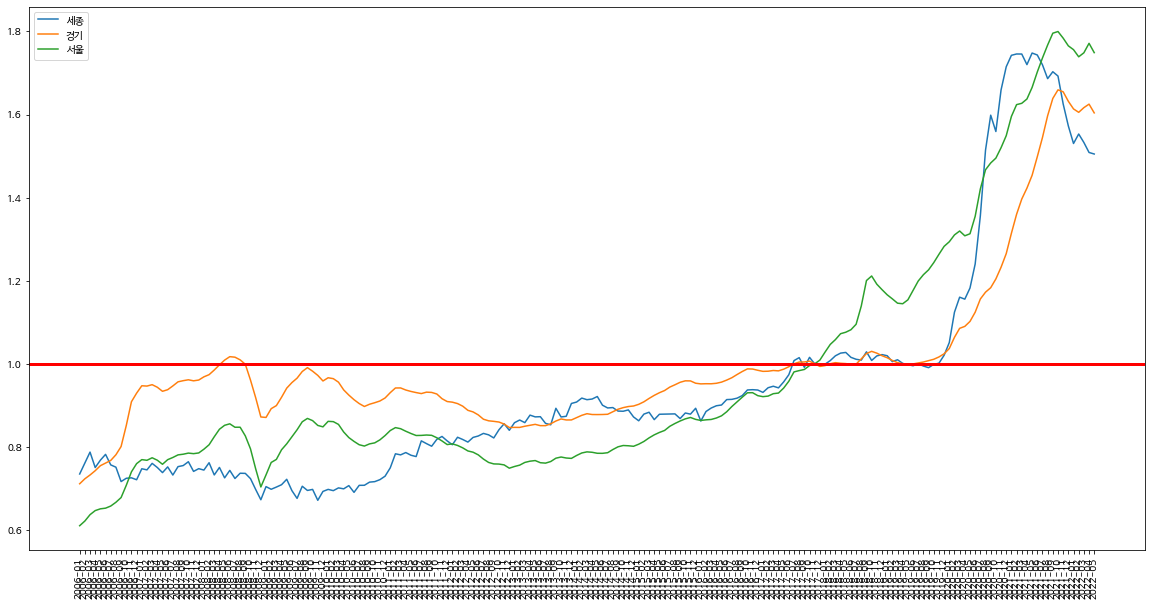

In [63]:
plt.figure(figsize=(20,10))
plt.plot(df_BEST.index,df_BEST)
plt.legend(df_BEST.columns,loc='upper left')
plt.xticks(rotation=90)
plt.axhline(y=1,color='r',linewidth=3)

plt.show()

가장 등락폭이 큰 지역 3개의 그래프로 알 수 있는 점

1. 2017년 11월 이전의 그래프를 살펴보면 경기와 서울의 그래프가 비슷한 추세로 진행되는 것으로 보아  두 지역의 집값이 서로의 지역에 영향을 준다는 것을 알 수 있다. 


2.2017년 11월 이후에는 서울의 집 값 지수 그래프가 경기 집 값 지수를 역전하는 그래프를 보이고 있다.
이는 같은 폭으로 상승하던 17년 11월 이전과는 다르게 서울의 집 값이 대폭 상승하였다는 사실을 발견할 수 있다.


3. 가장 큰 상승폭을 보여주는 지역은 세종시라는 사실을 알 수 있다.

###도출점

1.전국적으로 2022년 4월 이후에는 집 값이 하락하는 그래프를 보여주고 있다. 

코로나 사태로 인하여 급격하여 상승한 집 값이 2022년에는 점점 하락하는 추세를 보일 것이다.

2.집값 상승에 영향을 주는 이슈가 있을 경우 지방은 이슈에 큰 영향을 받지 않는다는 사실을 알 수 있었다.
사회적으로 큰 이슈가 발생하였을 경우에는 지방보다는 수도권을 위주로 집을 구매하는 것이 좋을 것이다.

3.하지만 집 값이 큰 폭으로 상승하는 지역일수록 하락의 폭 또한 굉장히 크기 때문에 위험성이 높다.

4.서울, 경기를 제외한 지역의 경우 투기 목적이나 이슈로 인한 급격한 상승으로 오른 지역이 대부분이었다. 그러나 대전은 급격한 변화보다는 꾸준한 상승을 보여주었기 떄문에 앞으로의 집 값 상승 또한 기대해 볼 수 있으며 다른 지역에 비해 안정적인 변동폭을 보여줄 것으로 기대된다.

